In [271]:
import pandas as pd

# Adjust the delimiter based on your file's structure
df = pd.read_csv('this_is_it.csv', delimiter=',')

# Display the first few rows
print(df.head())

                                Name  Min Players  Max Players  Play Time  \
0                         Gloomhaven            1            4        120   
1          Pandemic Legacy: Season 1            2            4         60   
2                  Brass: Birmingham            2            4        120   
3                  Terraforming Mars            1            5        120   
4  Twilight Imperium: Fourth Edition            3            6        480   

   Min Age  Users Rated  Rating Average  Complexity Average  Owned Users  \
0       14        42055            8.79                3.86        68323   
1       13        41643            8.61                2.84        65294   
2       14        19217            8.66                3.91        28785   
3       12        64864            8.43                3.24        87099   
4       14        13468            8.70                4.22        16831   

          Domain1  ...  Most Notable Genre  Most Notable Mechanic   Price  \
0  

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21186 entries, 0 to 21185
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   21186 non-null  object 
 1   Min Players            21186 non-null  int64  
 2   Max Players            21186 non-null  int64  
 3   Play Time              21186 non-null  int64  
 4   Min Age                21186 non-null  int64  
 5   Users Rated            21186 non-null  int64  
 6   Rating Average         21186 non-null  float64
 7   Complexity Average     21186 non-null  float64
 8   Owned Users            21186 non-null  int64  
 9   Domain1                21186 non-null  object 
 10  above_average          21186 non-null  bool   
 11  Bayesian Average       21186 non-null  float64
 12  Most Notable Genre     21186 non-null  object 
 13  Most Notable Mechanic  21186 non-null  object 
 14  Price                  21186 non-null  float64
 15  pc

In [273]:
df_rating = df.drop(columns=['Bayesian Average', 'Name', 'Rating Average', 'bayes_above_average', 'Owned_Bool', 'Year Offset'])
df_rating.head()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,Domain1,above_average,Most Notable Genre,Most Notable Mechanic,Price,pct_rated,Year Published,Owned_Per_Year,perYear_Bool
0,1,4,120,14,42055,3.86,68323,Strategy Games,True,Adventure,Action Queue,99.00,0.62,2017,9760.43,True
1,2,4,60,13,41643,2.84,65294,Strategy Games,True,Environmental,Action Points,49.50,0.64,2015,7254.89,True
2,2,4,120,14,19217,3.91,28785,Strategy Games,True,Age of Reason,Hand Management,105.00,0.67,2018,4797.50,True
3,1,5,120,12,64864,3.24,87099,Strategy Games,True,Economic,Closed Drafting,69.90,0.74,2016,10887.38,True
4,3,6,480,14,13468,4.22,16831,Strategy Games,True,Civilization,Action Drafting,127.99,0.80,2017,2404.43,True


In [274]:
df_rating = pd.get_dummies(df_rating, columns=['Most Notable Genre', 'Most Notable Mechanic', 'Domain1'])
df_rating.tail()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,above_average,Price,pct_rated,...,Most Notable Mechanic_unspecified,Domain1_Abstract Games,Domain1_Children's Games,Domain1_Customizable Games,Domain1_Family Games,Domain1_Party Games,Domain1_Strategy Games,Domain1_Thematic Games,Domain1_Wargames,Domain1_other
21181,2,2,30,4,1340,1.00,427,False,150.00,3.14,...,False,False,True,False,False,False,False,False,False,False
21182,2,99,60,5,2154,1.05,1533,False,15.50,1.41,...,False,False,False,False,False,True,False,False,False,False
21183,2,4,30,3,4006,1.08,5788,False,5.00,0.69,...,False,False,True,False,False,False,False,False,False,False
21184,2,6,30,3,3783,1.02,4400,False,2.99,0.86,...,False,False,True,False,False,False,False,False,False,False
21185,2,2,1,4,3275,1.16,1374,False,57.00,2.38,...,False,True,False,False,False,False,False,False,False,False


In [275]:
X = df_rating.copy()
X.drop('above_average', axis=1, inplace=True)
X.head()

,Min Players,Max Players,Play Time,Min Age,Users Rated,Complexity Average,Owned Users,Price,pct_rated,Year Published,...,Most Notable Mechanic_unspecified,Domain1_Abstract Games,Domain1_Children's Games,Domain1_Customizable Games,Domain1_Family Games,Domain1_Party Games,Domain1_Strategy Games,Domain1_Thematic Games,Domain1_Wargames,Domain1_other
0,1,4,120,14,42055,3.86,68323,99.00,0.62,2017,...,False,False,False,False,False,False,True,False,False,False
1,2,4,60,13,41643,2.84,65294,49.50,0.64,2015,...,False,False,False,False,False,False,True,False,False,False
2,2,4,120,14,19217,3.91,28785,105.00,0.67,2018,...,False,False,False,False,False,False,True,False,False,False
3,1,5,120,12,64864,3.24,87099,69.90,0.74,2016,...,False,False,False,False,False,False,True,False,False,False
4,3,6,480,14,13468,4.22,16831,127.99,0.80,2017,...,False,False,False,False,False,False,True,False,False,False


In [276]:
y = df_rating['above_average']

In [277]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80/20 split (test_size=0.2 means 20% test data, 80% training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [278]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=500, max_depth=14, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [280]:
# Make predictions on the training set
train_predictions = rf_model.predict(X_train_scaled)

# Optionally, calculate and print classification report for training set
from sklearn.metrics import classification_report
print("Training Data Classification Report")
print(classification_report(y_train, train_predictions))

Training Data Classification Report
              precision    recall  f1-score   support

       False       0.85      0.91      0.88      6439
        True       0.90      0.84      0.87      6272

    accuracy                           0.87     12711
   macro avg       0.88      0.87      0.87     12711
weighted avg       0.88      0.87      0.87     12711



In [281]:
predictions = rf_model.predict(X_test_scaled)

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [283]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3530,778
Actual 1,993,3174


Accuracy Score : 0.7910324483775811
Classification Report
              precision    recall  f1-score   support

       False       0.78      0.82      0.80      4308
        True       0.80      0.76      0.78      4167

    accuracy                           0.79      8475
   macro avg       0.79      0.79      0.79      8475
weighted avg       0.79      0.79      0.79      8475



In [284]:
# Zip feature importances with column names, sort by importance in descending order, and then select top 10
top_10_features = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)[:10]

# Display the top 10 features
for importance, feature in top_10_features:
    print(f"{feature}: {importance}")

Complexity Average: 0.12731942713585873
Year Published: 0.12015427982382276
Price: 0.1170578980137538
Owned_Per_Year: 0.10191671309956513
Owned Users: 0.05712886332336703
Play Time: 0.051010621792470894
Users Rated: 0.05085002966297318
perYear_Bool: 0.04739516700697399
Min Age: 0.036435866926031006
pct_rated: 0.035797364297748775


<Axes: title={'center': 'Top 10 Feature Importances'}, ylabel='1'>

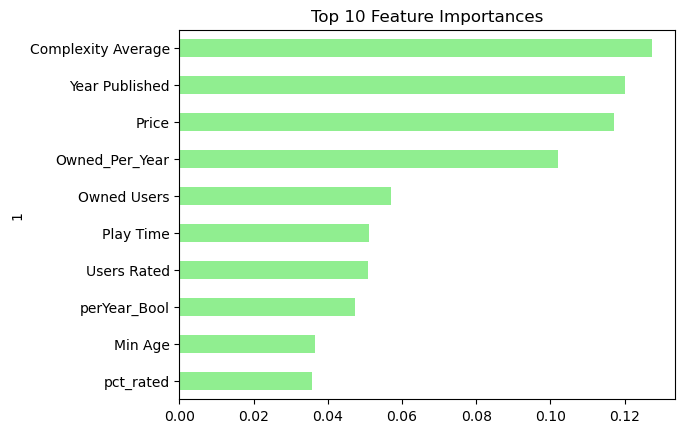

In [285]:
# Visualize the top 10 features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

# Select the top 10 features
top_10_importances = importances_df.head(10)

# Sort and plot the top 10 features
top_10_importances_sorted = top_10_importances.sort_values(by='Feature Importances')
top_10_importances_sorted.plot(kind='barh', color='lightgreen', title='Top 10 Feature Importances', legend=False)

In [286]:
# Extract just the feature names from the top 10
top_10_feature_names = [feature for importance, feature in top_10_features]

# Print the top 10 feature names
print(top_10_feature_names)

['Complexity Average', 'Year Published', 'Price', 'Owned_Per_Year', 'Owned Users', 'Play Time', 'Users Rated', 'perYear_Bool', 'Min Age', 'pct_rated']


In [287]:
# Set X to the top 10 features from df_merged
X = df_rating[top_10_feature_names]

In [288]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize the model (RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# Step 2: Fit the model using the scaled training data
model.fit(X_train_scaled, y_train)  # Assuming X_train_scaled and y_train are already set

RandomForestClassifier(random_state=42)

In [289]:
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Make predictions using the test set
y_pred = model.predict(X_test_scaled)  # Assuming you've already scaled and split your data

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 3: Generate the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[3548  760]
 [ 913 3254]]

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.82      0.81      4308
        True       0.81      0.78      0.80      4167

    accuracy                           0.80      8475
   macro avg       0.80      0.80      0.80      8475
weighted avg       0.80      0.80      0.80      8475



In [290]:
# Assuming your boolean column is called 'your_boolean_column'
df_rating['above_average'].value_counts()

above_average
False    10747
True     10439
Name: count, dtype: int64

In [291]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already prepared
model = KNeighborsClassifier(n_neighbors=40)

# Train the KNN model
model.fit(X_train, y_train)

# Evaluate on the test data
y_pred = model.predict(X_test)

# Calculate accuracy or other metrics
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7420648967551623


In [292]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[3533 1411]
 [ 775 2756]]
              precision    recall  f1-score   support

       False       0.82      0.71      0.76      4944
        True       0.66      0.78      0.72      3531

    accuracy                           0.74      8475
   macro avg       0.74      0.75      0.74      8475
weighted avg       0.75      0.74      0.74      8475

